# <center>Індивідуальний проект. Прогноз, чи дохід перевищує 50 тисяч $ на рік, на основі даних перепису населення
<center> Автор:Гонтаренко Яна

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# ігноруєм warnings
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

# налаштування зовнішнього вигляду графіків в seaborn
sns.set_context(
    "notebook", 
    font_scale = 1.5,       
    rc = { 
        "figure.figsize" : (12, 9), 
        "axes.titlesize" : 18 
    }
)

/home/hontik/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df = pd.read_csv('adult_data.csv',index_col=False, sep=',')
#Виводимо дані, щоб перевірити, чи все правлиьно записалось в dataFrame
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
print("Кількість людей,які присутні в dataFrame:",len(df))

Кількість людей,які присутні в dataFrame: 32560


In [4]:
print("Кількість ознак за якими буде проводитись аналіз:",len(df.columns))

Кількість ознак за якими буде проводитись аналіз: 15


Нам треба попрацювати над цільовою ознакою, щоб вона мала звичний для нас вигляд. Як видно вище, цільова ознака income має значення >50 та <=50. Нам потрібно, щоб там було 0 - коли дохід людини менший рівний за 50 тисяч, та 1 коли дохід більший.

In [5]:
df['income']= df['income']==">50K"
df['income']=df['income'].astype('int64')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


# <center>Ознаки <center>
Є всьо три типи ознак **binary** - бінарний, **numeric** - чисельний и **nominal** - категоріальний.

**age** - вік людини (numeric)   
**workclass** - з якого робочого класу людина (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked)   
**fnlwgt** - вага людини (numeric)    
**education** - освіта (categorial)   
**education-num** - кількість освіт( numeric)   
**marital-status** - сімейни стан (categorial)   
**occupation** - сфера роботи (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces)   
**relationship** - хто він в взаємовідносинах (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. )   
**race** - раса людини(White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)   
**sex** - стать (бінарний: Female, Male)    
**capital-gain** - скільки заробляє (numeric)           
**capital-loss** - скільки витрачає (numeric)      
**hours-per-week** - скільки людина працює (numeric)   
**native-country** - батьківщина (categorial)      
**income** - дохід, цільова ознака, з якою будемо працювати(binary:0, 1)

**В моїх планах подивитись на взаємодію між ознаками. Та підібрати модель, яка буде найкраще передбачати чи зароблятиме людина в рік більше, ніж 50 тисяч $**

# <center> Візуалізація даних <center>

Для початку я планую за допомогою простих гістограм подивитись, від яких ознак найбільше залежить чи заробляє людина більше 50 тисяч $ в рік. Спочатку подивимось на загальну кількість тих людей, що мають таку заробітну плату і на тих, що не мають.

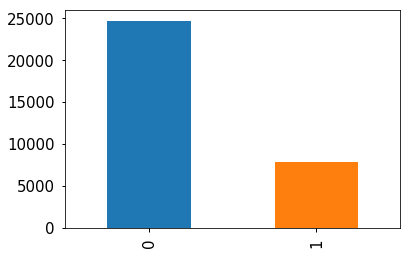

In [6]:
df['income'].value_counts().plot(kind='bar', label='Income')

Видно, що кількість людей з такою заробітньою платою значно менша. Приблизно в чотири рази. Тепер можемо подивитись,яка залежність цільової змінної від статі.

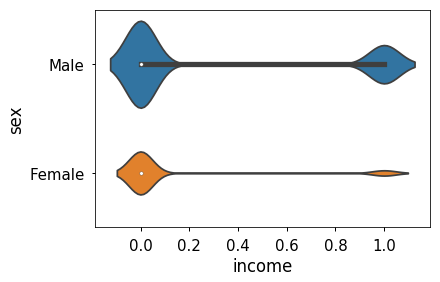

In [7]:
sns.violinplot(x='income', y='sex', scale = 'count', data=df);

З цього графіку ми можемо побачити, що по-перше, жінок з таким доходом дуже мало і, по-друге, що жінок в нашому наборі даних явно менше,ніж чоловіків. Подивимось на залежність від віку таким самим чином.

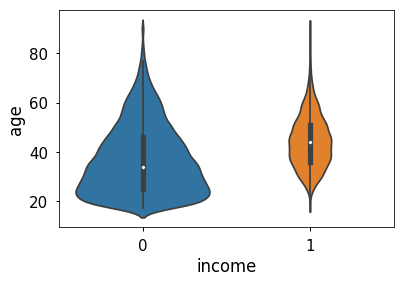

In [8]:
sns.violinplot(x='income', y='age', scale = 'count', data=df);

З цього графіку видно, що, найбільше людей без такого прибутку в віці 25 років(приблизно), а з таким прибутко в віці від 25 до 50(також приблизно). Це важлива ознака. Подивимось на залежність від ваги. ( В нашому наборі даних вага в грамах. Переведемо її в кілограми.

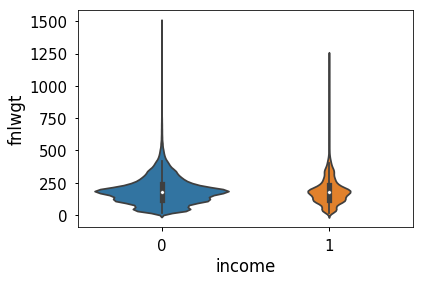

In [9]:
df['fnlwgt']=df['fnlwgt']/1000
sns.violinplot(x='income', y='fnlwgt', scale = 'count', data=df);

Видно, що багато людей з вагою близько двухсот кг не отримують такого доходу. Хоча в той же час найбільше людей з такою вагою отримають бажаний дохід.

Зробивши маленький аналіз можна побачити , що не мало впливатимуть ознаки sex, fnlwgt, а от age матиме великий вплив на побудування моделі.

Мені відомо, що для того, щоб краще зрозуміти ознаки в наборі даних можна побудувати для них матрицю кореляції. Але для того, щоб побудувати матрицю кореляції всі дані мають бути чисельні. Потрібно переформатувати категоріальні та бінарні дані. Також цільову ознаку потрібно "відрізати" від основного набору даних.

In [10]:
binary_features=['sex']
categorial_features=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']
numeric_features=['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [13]:
data_num=df[numeric_features]
data_bin=df[binary_features]
data_cat=df[categorial_features]

Далі виконаємо перетворення бінарних та категоріальних ознак.

In [14]:
data_bin_dum=pd.get_dummies(data_bin)
data_bin_dum.head()

,sex_Female,sex_Male
0,0,1
1,0,1
2,0,1
3,1,0
4,1,0


Після перетворення бінарні ознаки розбились на пари,що доповняють один одного. Можна залишити тільки одну з цих ознак.

In [15]:
data_bin_cut=data_bin_dum.iloc[:,1::2]

In [16]:
l = []
for x in data_cat.columns:
    ans = pd.factorize(data_cat[x])
    l.append(ans[0])
d = {'workclass':l[0], 'education':l[1], 'marital-status':l[2], 'occupation':l[3], 'relationship':l[4], 'race':l[5], 'native-country':l[6]}
data_cat_format = pd.DataFrame(d)
data_cat_format.head()

,workclass,education,marital-status,occupation,relationship,race,native-country
0,0,0,0,0,0,0,0
1,1,1,1,1,1,0,0
2,1,2,0,1,0,1,0
3,1,0,0,2,2,1,1
4,1,3,0,0,2,0,0


Що ж, ніби задумка вдалась. Наш переформатований датасет можна зібрати в новий, з яким ми і будемо працювати надалі.

In [17]:
data = pd.concat([data_num,data_bin_cut,data_cat_format, df['income']],axis=1)
data.head(15)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,sex_Male,workclass,education,marital-status,occupation,relationship,race,native-country,income
0,50,83.311,13,0,0,13,1,0,0,0,0,0,0,0,0
1,38,215.646,9,0,0,40,1,1,1,1,1,1,0,0,0
2,53,234.721,7,0,0,40,1,1,2,0,1,0,1,0,0
3,28,338.409,13,0,0,40,0,1,0,0,2,2,1,1,0
4,37,284.582,14,0,0,40,0,1,3,0,0,2,0,0,0
5,49,160.187,5,0,0,16,0,1,4,2,3,1,1,2,0
6,52,209.642,9,0,0,45,1,0,1,0,0,0,0,0,1
7,31,45.781,14,14084,0,50,0,1,3,3,2,1,0,0,1
8,42,159.449,13,5178,0,40,1,1,0,0,0,0,0,0,1
9,37,280.464,10,0,0,80,1,1,5,0,0,0,1,0,1


Скачаний мною набір даних мав пропущені значення. Я знаю, що їх можна було видалити функцією dropna ще спочатку,але тоды я б не змогла поставити правильну в правильній відповідності категоріальні ознаки. Тож, я мала йти на хитрість. Зараз пропущені значення = -1. Цікаво чи зможемо ми їх викинути? Для цього подивимось чи дуже багато пропущених даних в нашому наборі даних.

In [18]:
dataT = data.T.astype('int64')
tmp = pd.DataFrame()
for x in dataT.columns:
    if -1 not in np.array(dataT[x]):
        tmp[x]=dataT[x]

In [19]:
print(len(data)-len(tmp.T))

2399


Відразу видно, що це не матиме великий вплив. Адже все одно набір даних буде великим. Отже, викинемо пропущені значення.

In [20]:
data=tmp.T
data.head(15)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,sex_Male,workclass,education,marital-status,occupation,relationship,race,native-country,income
0,50,83,13,0,0,13,1,0,0,0,0,0,0,0,0
1,38,215,9,0,0,40,1,1,1,1,1,1,0,0,0
2,53,234,7,0,0,40,1,1,2,0,1,0,1,0,0
3,28,338,13,0,0,40,0,1,0,0,2,2,1,1,0
4,37,284,14,0,0,40,0,1,3,0,0,2,0,0,0
5,49,160,5,0,0,16,0,1,4,2,3,1,1,2,0
6,52,209,9,0,0,45,1,0,1,0,0,0,0,0,1
7,31,45,14,14084,0,50,0,1,3,3,2,1,0,0,1
8,42,159,13,5178,0,40,1,1,0,0,0,0,0,0,1
9,37,280,10,0,0,80,1,1,5,0,0,0,1,0,1


Неозброєним оком можна помітити, що різниця в даних дуже велика. Адже майже весь датасет має значення від 0 до 15 та тільки три колонки age, fnlwgt, hours-per-week мають значення більше (в колонці fnlwgt взагалі значення перевищують інщі в сотні разів. Це означає, що їх потрібно промасштабувати. Але перед цим зберігаємо цільову ознаку, адже вона нам потрібна в цілому вигляді пізніше.

In [21]:
income=data['income']
data = pd.DataFrame(scale(data), columns=data.columns)

Після всіх цих перетворень можна легко побудувати матрицю кореляції,щоб побачити залежність між даними.

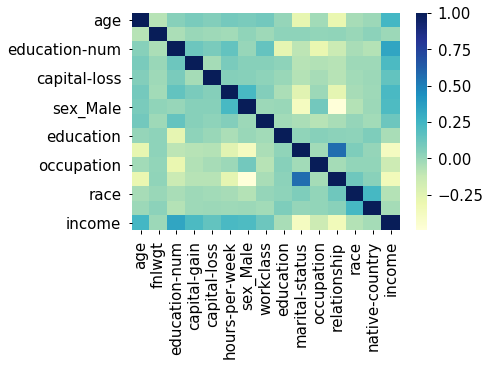

In [22]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, cmap="YlGnBu");

Після того,як ми проаналізуємо матрицю кореляції,то можна зробити висновок, що немає ознак, що дуже кореляють, це означає, що побудована модель буде коректною. 

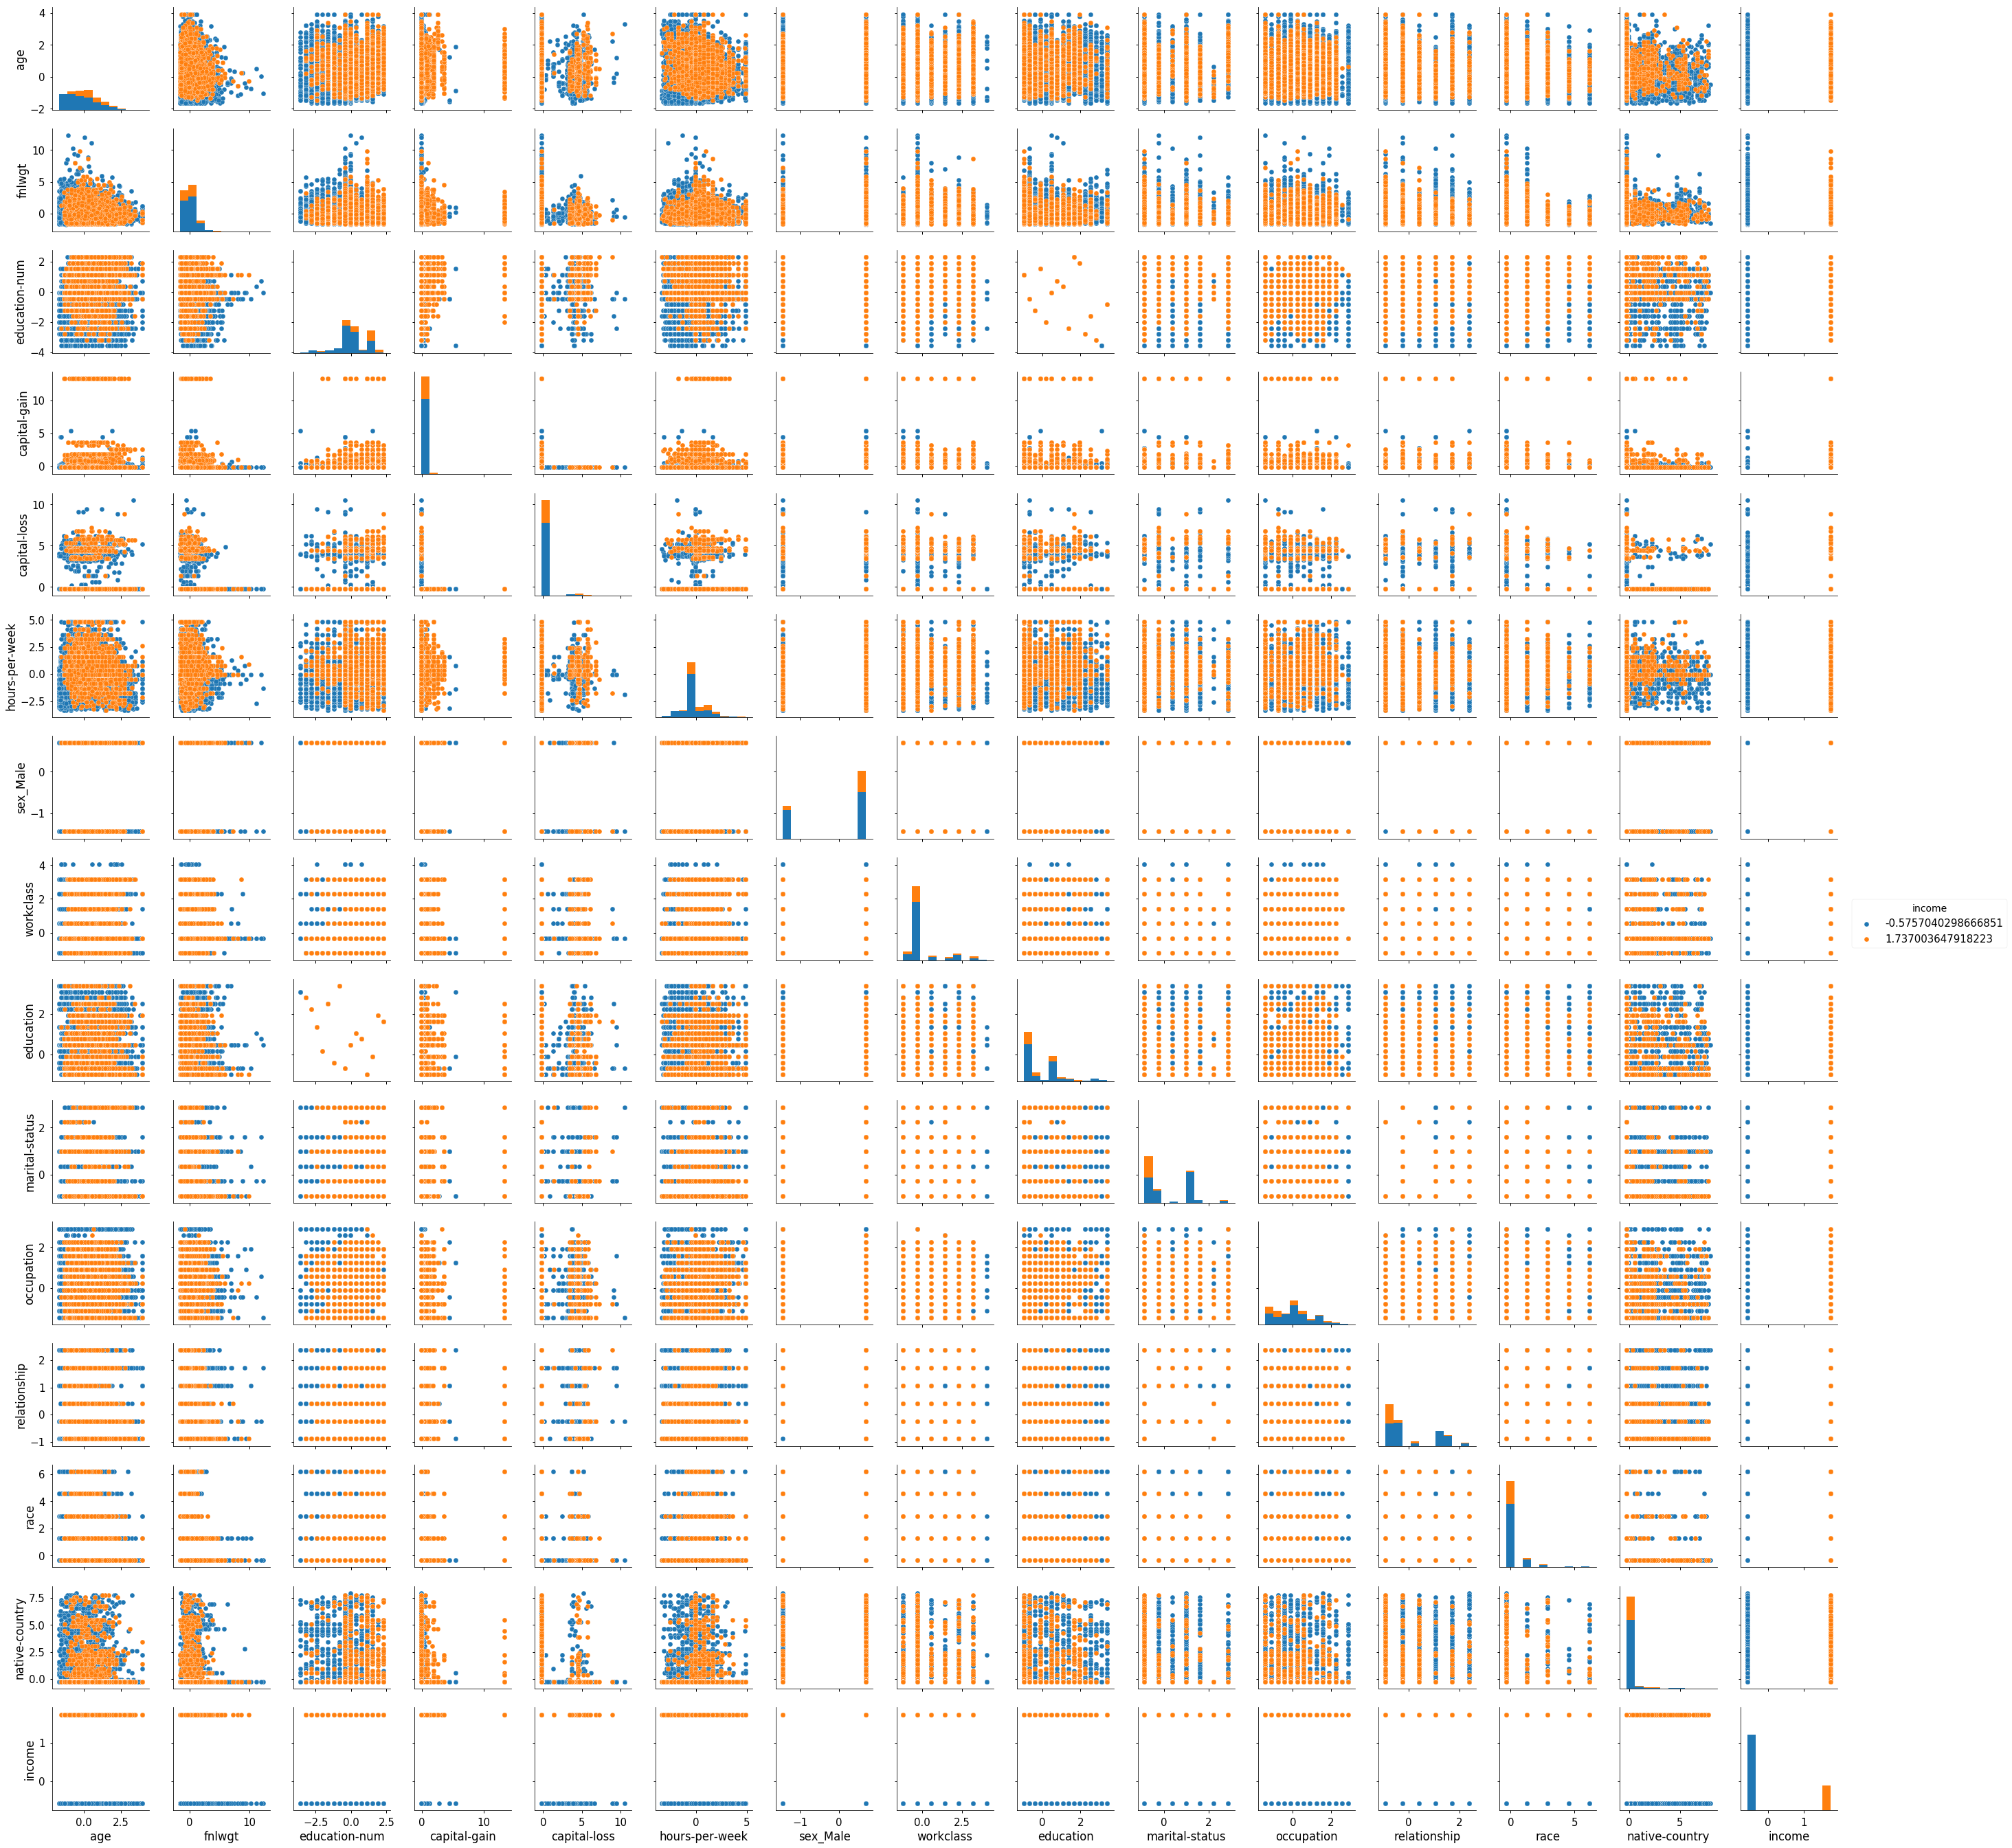

In [23]:
sns.pairplot(data[data.columns], hue='income');

Проглянувши графіки можна зробити вcновок, що дані добре промаштабовані і з ними можна тепер працювати. Залишилось тільки  відділити цільову ознаку.

In [24]:
data=data.drop(['income'], axis=1)

# <center> Проведення досліджень <center>

Так, як у мене задача класифікації я буду використовувать такі методи: метод ближчих сусідів, логістичну регресію та випадковий ліс. 

Спершу я планую розділити дані на ті, на яких моделі будуть навчатись та ті, на яких я буду перевірятися їх якість. 

In [25]:
X, y=data, income

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

Тепер створюю моделі та навчаю їх.

In [27]:
KNC = KNeighborsClassifier(n_neighbors=3)
LR = LogisticRegression(C=100, penalty="l1", random_state=42)
RFC = RandomForestClassifier(max_depth=5, random_state=42)

In [28]:
KNC.fit(X_train, y_train)
LR.fit(X_train, y_train)
RFC.fit(X_train, y_train);

Тепер подивимось, що прогнозує нам певний метод і зрівняємо його з правильними значеннями.

In [29]:
KNCpredict = KNC.predict(X_test)
LRpredict = LR.predict(X_test)
RFCpredict = RFC.predict(X_test)

In [30]:
print("KNN - Прогнози для відкладеної вибірки : ", accuracy_score(y_test, KNCpredict))
print("LR - Прогнози для відкладеної вибірки : ", accuracy_score(y_test, LRpredict))
print("RFC - Прогнози для відкладеної вибірки : ", accuracy_score(y_test, RFCpredict))

KNN - Прогнози для відкладеної вибірки :  0.8119129185545364
LR - Прогнози для відкладеної вибірки :  0.8339042988175489
RFC - Прогнози для відкладеної вибірки :  0.843518620842082


Ми бачимо, що результати досить не погані. Але зараз я підбирала вхідні дані для моделей навмання. Тепер можна поексперементувати з кросвалідацією. 

In [31]:
KNNparam = {'n_neighbors':range(2, 10)}
LRparam = {'C':[0.001, 0.1, 10, 100], 'penalty':["l1", "l2"]}
RFCparam = {'n_estimators':range(3, 10), 'max_features':range(3, 7), 'max_depth':range(5, 10)}

In [32]:
KNCGV = KNeighborsClassifier()
LRGV = LogisticRegression()
RFCGV = RandomForestClassifier()

In [33]:
knn_grid = GridSearchCV(KNCGV, KNNparam, cv=5, n_jobs=-1)
lr_grid = GridSearchCV(LRGV, LRparam, cv=5, n_jobs=-1)
rfc_grid = GridSearchCV(RFCGV, RFCparam, cv=5, n_jobs=-1)

In [34]:
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': range(2, 10)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [35]:
lr_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.001, 0.1, 10, 100], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [36]:
rfc_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': range(3, 10), 'max_features': range(3, 7), 'max_depth': range(5, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [37]:
print("KNN - найкращі параметри{}, найкращий результат {}".format(knn_grid.best_params_, knn_grid.best_score_))

KNN - найкращі параметри{'n_neighbors': 9}, найкращий результат 0.8305229253505115


In [38]:
print("LR - найкращі параметри{}, найкращий результат {}".format(lr_grid.best_params_, lr_grid.best_score_))

LR - найкращі параметри{'C': 0.1, 'penalty': 'l2'}, найкращий результат 0.838527851458886


In [39]:
print("RFC - найкращі параметри{}, найкращий результат {}".format(rfc_grid.best_params_, rfc_grid.best_score_))

RFC - найкращі параметри{'max_depth': 9, 'max_features': 6, 'n_estimators': 8}, найкращий результат 0.8581849185297461


Подивимось які будуть прогнози тепер.

In [40]:
knc_gridpredict = knn_grid.predict(X_test)
lr_gridpredict = lr_grid.predict(X_test)
rfc_gridpredict = rfc_grid.predict(X_test)

In [41]:
print("Кросвалідація KNN - Прогнози для відкладеної вибірки : ", accuracy_score(y_test, knc_gridpredict))
print("Кросвалідація LR - Прогнози для відкладеної вибірки : ", accuracy_score(y_test, lr_gridpredict))
print("Кросвалідація RFC - Прогнози для відкладеної вибірки : ", accuracy_score(y_test, rfc_gridpredict))

Кросвалідація KNN - Прогнози для відкладеної вибірки :  0.8260581279699414
Кросвалідація LR - Прогнози для відкладеної вибірки :  0.8336832799204332
Кросвалідація RFC - Прогнози для відкладеної вибірки :  0.8553431318377721


Провівши всі дослідження можна сказати,що найкращою моделю буде випадковий ліс з глибиною дерева 9, з кількістю дерев,які оброблялись також 9 та кількістю ознак, які оброблялись 6. Також можна помітити,що результати на прогнозованих даних майже такі, як на тестових. Отже, я побудувала модель, яка не перенавчилась і добре працювала з даними. Також можна помітити, що результати не дуже відрізняються між собою, можливо це зв'язано з природою даних, або підібрано не ті моделі. Але все ж в даному випадку завжди випадковий ліс працює краще.